In [1]:
from matplotlib import pyplot as plt
import numpy as np

Unicode Braille:

```
1 4
2 5
3 6
7 8
```

In [2]:
BRAILLE = (( 1,   8),
           ( 2,  16),
           ( 4,  32),
           (64, 128))
BLANK = 10240

In [93]:
# Start with blank braille template
test = BLANK
# Add dots by adding respective values from template
test = test + BRAILLE[0][0] + BRAILLE[1][1] + BRAILLE[2][0] + BRAILLE[2][1] + BRAILLE[3][1]
print(chr(test))

⢵


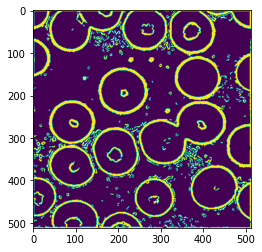

(512, 512)


In [102]:
PATH = './images/results/cells/step5a.png'
image = plt.imread(PATH)
#image[image[:] > 0.5] = 1
image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140]) 
plt.imshow(image)
plt.show()
print(image.shape)

In [103]:
dx, dy = 5, 5

def braille(img, dx, dy):
    m, n = img.shape
    res = np.zeros((int(round(m / dy / 4)), int(round(n / dx / 2))), dtype='int')
    for i in range(0, int(round(m / dy)), 4):
        for j in range(0, int(round(n / dx)), 2):
            block = BLANK
            for ii in range(i, i + 4):
                for jj in range(j, j + 2):
                    try:
                        if img[int(round(ii * dy))][int(round(jj * dx))] > 0.5:
                            block += BRAILLE[ii-i][jj-j]
                    except IndexError as e:
                            pass
                # Very hacky, need to refactor
                try:
                    res[i // 4][j // 2] = block
                except IndexError as e:
                    pass
    return res

x = braille(image, dx, dy)
print(x.shape, end = '\n\n')
for i in range(len(x)):
    for j in range(len(x[0])):
        print(chr(x[i][j]), end = '')
    print()

(26, 51)

⡏⠉⠉⢹⢉⡹⠋⠉⠉⠉⢩⢭⠉⠉⠉⠙⠭⣉⠽⠉⢩⠟⡩⠋⠉⠉⠉⠉⠉⠻⢍⠉⡉⡩⠋⠉⠉⠉⠉⠙⢭⡛⠯⣭⠭⠻⠹⡍⠉⠉⠉
⡇⣀⡴⡇⡼⠁⠀⠀⠀⠀⠀⠬⠃⠀⠀⠀⠀⠀⠀⢀⠮⡰⠁⠀⠀⠀⣀⠀⡀⠀⠈⣆⢹⠀⠀⠀⣠⢤⣄⠀⠀⠙⡟⠁⠀⠀⠈⠘⢦⣀⡀
⠋⠉⠀⢉⣇⠀⠀⠀⠀⠀⠀⠀⠀⡾⠓⠖⣶⠒⠾⢁⠌⢧⠀⠀⠀⠀⣀⣀⡂⠀⠀⡇⢼⠀⠀⢸⠁⠀⠀⠃⠀⠀⣻⠀⠀⠀⠀⠀⠀⠈⠉
⡤⣄⡀⠸⢹⡄⠀⠀⠀⠀⠀⠀⢠⠟⠀⡠⠄⠄⠀⠢⠄⡙⣦⠀⠀⠀⠀⠀⠀⢀⡴⢇⠸⡀⠀⠘⠦⠖⠊⠀⠀⢀⡟⠀⠀⠀⠀⠀⠀⠀⠀
⡇⠈⠙⣆⠀⠙⠲⢤⣄⣀⣤⠶⠋⠀⠀⠀⢨⢵⠔⠉⢀⠈⠒⠓⠶⠤⡤⠤⠶⠏⠂⠘⠞⠟⠦⣄⡀⠀⠀⣀⣤⠞⠀⠀⠀⠀⠀⠀⠀⠀⠀
⡇⠀⠀⢸⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠐⠀⠈⠀⢀⣀⠀⠀⠀⢀⡀⠀⠀⠀⠀⠀⠀⠈⣙⣭⠭⢥⣄⡀⠴⠀⠀⠀⠂⠀⠠⣠⠖
⡇⠀⢀⡾⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⠈⠁⠀⠀⠀⠈⠁⠀⠀⢠⠀⠀⣠⠞⠁⠀⠀⠀⠀⠉⠳⡄⠀⠀⠀⠨⡞⠁⠀
⡧⠴⠺⠅⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠋⠉⠉⠉⠛⠦⣀⠀⠀⠀⠀⠀⠀⠀⢰⡇⠀⠀⠀⠀⠀⠀⠀⠀⢱⢀⡀⠀⠐⠀⠀⠀
⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⢀⡞⠁⠀⠀⠀⠀⠀⠀⠀⠘⣦⠀⠀⠀⠀⠀⠀⢸⡅⠀⠀⠀⠀⠀⠀⠀⠀⢸⢃⠄⠀⠐⢧⠀⠀
⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠀⠀⠀⠀⡄⡄⠀⠀⠀⢸⠂⠀⠀⠀⠀⣀⠀⠻⣄⠀⠀⠀⠀⠀⢀⣰⠿⠁⠀⠀⠀⢤⠙⠂
⡇⠀⠀⠀⠀⠀⠀⢀⣀⣀⣀⡀⠀⠀⠄⠀⣇⠀⠀⠀⠀⠉⠁⠀⠀⢀⡞⠰⠀⠀⠀⠀⠀⠀⠀⠘⠉⠒⣶⣖⣞⡛⠁⠀⠂⢌⠆⠀⢌⢰⠈
⠃⠀⠀⠀⠀⡴⠚⠉⠀⠀⠈⠉⠳⣄⠀⠀⠘⠳⣄⡀⠀⠀⠀⣀⡴⠟⠠⠄⠀⠀⠀⢀⡀⠀⠀⡴⠚⠉⠉⠉⠉⠉⠓⢦⡔⠀⠀⠀⠀⠀⠀
⡂⠀⠀⠀⣼⠁⠀⠀⠀⠀⠀⠀⠀⠘⣇⠀⠀⠀⠀⠉⠙⠙⠉⠁⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀⢹⡄⠀⠀⠀⠀⠀
⠁⠠⠄⠀⣧⠀⠀⠀⠘⢭⡱⠀⠀⠀⡟⠀⠀⠀⠀⣀⡀⠀⡄⠀⡀⠠⡤⠖⠋⠉⠉⠉⠒⠮⠇⠀⠀⠀⠐⣍⣦⠀⠀⠀⢀⡇⠀⠀⣀⣤⠤
⣄⠀⠀⠠⠙⢆⠀⠀⠀⠀⠀⠀⢀⡼⠕⢂⠖⠋⠉⠉⠉⠙⠳⡐⢐⡜⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁⠀⠀⢀⡼⠁⣠⠞⠁⠀⠀
⠄⣄⣤⠀⠐⠊⢑⢦⢤⠤⠤⢖⠛⠙⣼⠃⠀⠀⠀⠀⠀⠀⠀⠘⡄⢧⠀⠀⠀⠀⠀⠂⠅⠀⠀⢰⡖⡢⢤⣀⣠⡤⡶⠋⠀⢐⡇⠀⠀⠀⠀
⡗⡢⠐⠀⣍⣡⠖⠋⠉⠉⠑⠢⣴⠀⢧⠀⠀⠀⡰⠒⢢⠀⠀⠀⢱⠘⡄⠀⠀⠀⠘⠂⠀⠀⠀⣸⢘⡐⠨⠂⠀⠀⠀⠀⠀⠨⡇⠀⠀⠀⠀
⡏⠹⠆⢈⡼⠁⠀⠀⠀⠀⠀⠀⠈⢫⠘⡄⠀⠘⠦⣀⡠⠁⠀⠀⣸⠆⠈⣢⣄⡀⠀⠀⢀⣠⠔⠥⠇⡝⡅⡦⢘⣐⠀⠀⠀⠀⠻⣄⠀⠀⠀
⡇⠂⡀⢸⡇⠀⠀⠀⠠⡋⣀⠀⠀⠈⣆⠑⣄⠀⠀⠀⠀⠀⢀⣴⠃⠀⠀⠀⠀⠈⠉⠋⠍⠉⠐⠀⠐⢝⠌⣢⡢⠮⠶⠶⠦⣄⡀⠈⠙⠲⠒
⣏⣀